## Sobre o projeto

Neste projeto de portifolio, eu utilizo uma base de dados de uma seguradora que reuniu informações sobre os seus clientes juntamente com o interesse de renovar o contrato. E utilizando ciência de dados eu as faço gerar lucro, predizendo quais os clientes mais provaveis de renovar o contrato.

Link da base de dados https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

## Importando as bibliotecas utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
#Para remover possiveis warnings


## Lendo a base de treino

In [2]:
train = pd.read_csv('train.csv')

## Visualizando as primeiras linhas

In [3]:
train.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


## Informações interessantes a se verificar:

###### Porcentagem de seguros por gênero;
###### Análise de relação de bairros com outras colunas, exemplo bairros com maiores históricos de danos no veículo;
###### Análise estatística de seguros por idade;
###### Porcentagem de seguros por idade do veículo;
###### Porcentagem de seguros feitos com base em danos anteriores nos veículos;
###### Análise estatística de seguros pelo preço do veículo.

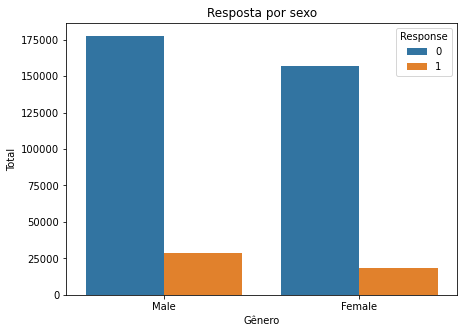

In [4]:
plt.subplots(figsize=(7,5))
ax = sns.countplot('Gender',hue='Response',data=train)
ax.set_title('Resposta por sexo')
ax.set(xlabel = 'Gênero', ylabel='Total')
plt.show()

Nada muito evidente nesta coluna, apenas um pouco mais de respostas positivas por homens.

## Abordagem por bairros em que os cliente moram 

In [4]:
aux = train[['Previously_Insured','Response','Vehicle_Damage','Region_Code']]

#Apenas para transformar em 0 e 1 respostas negativas e positivas relativas a veiculo danificado

aux['Vehicle_Damage'] = aux['Vehicle_Damage'].map(lambda x: 0 if x=='No' else 1)
aux = aux.groupby('Region_Code').sum()
aux.head(10)

,Previously_Insured,Response,Vehicle_Damage
Region_Code,,,
0.0,617,174,1184
1.0,326,109,630
2.0,1959,287,1839
3.0,4521,1181,4426
4.0,754,285,1011
5.0,475,148,751
6.0,4355,439,1794
7.0,1346,432,1800
8.0,17107,3257,15536


Continua até o bairro 52. Desses, iremos ver quais são os mais interessantes.

In [5]:
aux['Proporcao_Response_Previously_Insured'] = (aux['Response']/aux['Previously_Insured'])
#Porcentagem de pessoas que pessoas que tem seguro e tem interesse me renovar
aux['Proporcao_Response_Vehicle_Damage'] = (aux['Response']/aux['Vehicle_Damage'])
#Porcentagem de pessoas que pessoas que teve o veiculo danificado e tem interesse me renovar

In [6]:
aux.loc[aux['Proporcao_Response_Previously_Insured'] > 0.4].index,aux.loc[aux['Proporcao_Response_Vehicle_Damage'] > 0.3].index

(Float64Index([19.0, 28.0, 38.0], dtype='float64', name='Region_Code'),
 Float64Index([11.0, 18.0, 29.0], dtype='float64', name='Region_Code'))

Se fôssemos fazer uma abordagem por bairros, primeiro filtraríamos pela porcentagem de pessoas que tem seguro e tem interesse em renovar juntamente com a porcentagem de pessoas com veículo danificado de acordo com o bairro que ela mora. Podendo se flexibilizar a porcentagem.

### Análise estatistica de seguros por idade

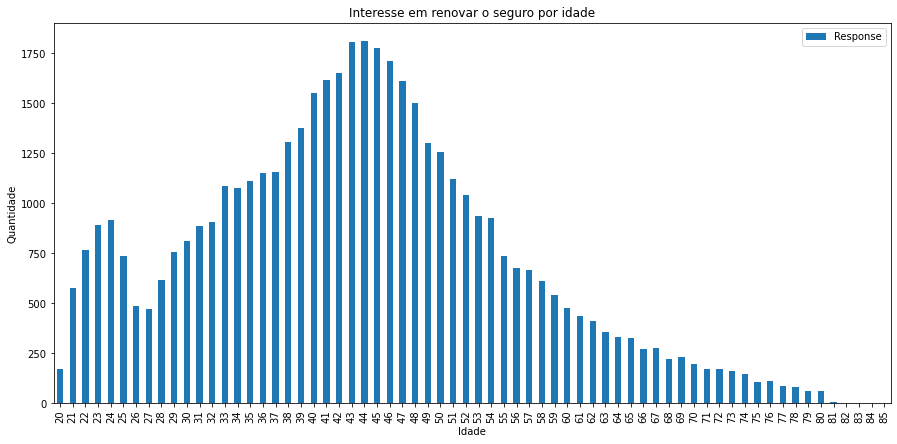

In [7]:
aux = train[['Age','Response']].groupby('Age').sum()
aux.plot(kind='bar',figsize=(15,7))
plt.title('Interesse em renovar o seguro por idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

Por algum fenômeno há algum pico entre 23 e 24 anos até diminuir. Aumentando novamente até o pico entre 44 e 45 anos, voltando a diminuir. Assemelha-se a uma distribuição normal.

### Interesse em renovar por idade do veiculo

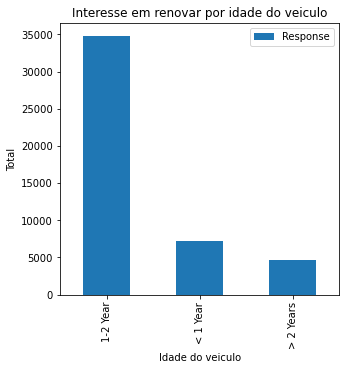

In [8]:
aux = train[['Vehicle_Age','Response']].groupby('Vehicle_Age').sum()
aux.plot(kind='bar',figsize=(5,5))
plt.title('Interesse em renovar por idade do veiculo')
plt.xlabel('Idade do veiculo')
plt.ylabel('Total')
plt.show()

Aqui percebemos que carros entre 1 e 2 anos. São os com maior incidência de interesse em renovar o contrato. 


### Porcentagem de seguros feitos com base em danos anteriores nos veiculos

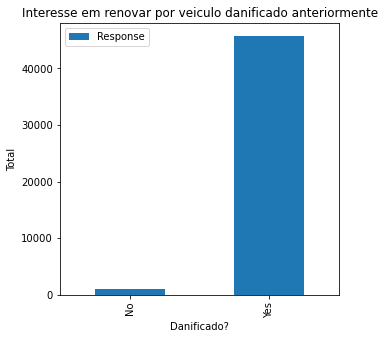

In [9]:
aux = train[['Vehicle_Damage','Response']].groupby('Vehicle_Damage').sum()
aux.plot(kind='bar',figsize=(5,5))
plt.title('Interesse em renovar por veiculo danificado anteriormente')
plt.xlabel('Danificado?')
plt.ylabel('Total')
plt.show()

Aqui percebemos que pessoas que tiveram o veiculo danificado tem um interesse muito maior para a renovação do que as que responderam negativamente, podendo ser nossa baseline.

### Análise estatística de seguros pelo preço do veículo

In [10]:
aux = train[['Annual_Premium', 'Response']]
aux['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Como os valores variam bastante, vamos criar intervalos para facilitar a análise.

In [11]:
def binarizar(x):
    if x >=0 and x < 10000:
        return '< 10000'
    elif x >= 10000 and x <= 20000:
        return '10000-20000'
    elif x > 20000 and x <= 30000:
        return '20001-30000'
    elif x>30000 and x <= 40000:
        return '30001-40000'
    elif x>40000 and x <= 50000:
        return '40001-50000'
    else: 
        return '> 50000'

In [12]:
aux['Annual_Premium'] = aux['Annual_Premium'].map(lambda x:binarizar(x))
aux['Annual_Premium'].value_counts()

30001-40000    125050
20001-30000     95392
< 10000         64882
40001-50000     57778
> 50000         32204
10000-20000      5803
Name: Annual_Premium, dtype: int64

In [13]:
aux = aux[['Annual_Premium','Response']].groupby('Annual_Premium').sum()

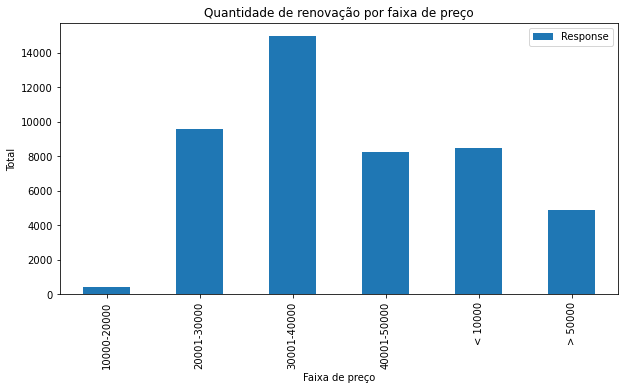

In [14]:
aux.plot(figsize=(10,5),kind='bar')
plt.title('Quantidade de renovação por faixa de preço')
plt.xlabel('Faixa de preço')
plt.ylabel('Total')
plt.show()

## Considerações finais

Sabemos que a visualização dos dados é uma parte essencial do desenvolvimento de projetos de machine learning. Fazendo a análise exploratória dos dados vemos que caso não tivessemos um modelo preditivo para nos auxiliar, poderiamos abordar os clientes com base em seu bairro, idade, histórico em relação a carros danificados, este por ultimo, que será nossa baseline